### Data Pre-processing Stage


  Pada notebook ini berisi tentang basic dalam data pre-processing


#### Why preprocessing ?
1. Data yang kita punya dalam dunia nyata biasanya:
    * Incomplete: lacking attribute values, lacking certain attributes of interest, or containing only aggregate data.
    * Noisy: mengandung error seperti missing values dan outliers.
    * Inconsistent: mengandung perbedaan dalam penulisan kolom.

Mari kita pakai sebuah dataset sederhana untuk latihan.
Dataset "data.csv" mengandung informasi dimana apakah user akan membeli sebuah product atau tidak.
User mempunya fitur age,salary, dan negara tempat mereka tinggal.

## 1. Import library

Pada percobaan kali ini kita hanya membutuhkan 2 library yaitu pandas dan numpy. Pandas berguna untuk mengimport datasetnya sedangkan numpy akan kita gunakan dalam mempreproses datanya.

In [ ]:
import numpy as np
import pandas as pd

## 2 Import dataset

In [ ]:
dataset = pd.read_csv("Data.csv")


# Menampilkan shape dari data yg kita punya
print('dataset:', (str(dataset.shape)))

dataset: (15, 4)


Dataset kita mengandung 15 rows dan 4 columns.
Itu artinya kita mempunyai 15 data dan 4 Kolom

In [ ]:
# print the dataset
dataset

,Country,Age,Salary,Purchased
0,India,34.0,92000.0,Yes
1,Sri lanka,22.0,25000.0,Yes
2,China,31.0,74000.0,Yes
3,Sri lanka,29.0,NaN,No
4,China,55.0,98000.0,Yes
5,India,24.0,30000.0,No
6,Sri lanka,28.0,40000.0,No
7,India,NaN,60000.0,No
8,China,51.0,89000.0,Yes
9,India,44.0,78000.0,Yes


## 3. Handle Missing Data


In [ ]:
# mengecek data null disetiap kolom
dataset.isnull().sum()

Country      0
Age          1
Salary       1
Purchased    0
dtype: int64

Dengan menggunakan fungsi isnull().sum() kita dapat melihat jumlah data yg memiliki missing value dari tiap kolom yang ada.
Disini kita dapat melihat kalau terdapat 2 kolom yang memiliki masalah missing value, yaitu pada kolom 'Age' dan 'Salary'.

Untuk menangangi masalah missing value, kita bisa melakukan 2 hal. Pertama kita bisa menghapus datanya atau kita bisa mengisi nilai yang kosong itu menggunakan nilai mean/modus/median.

Pada percobaan kali ini kita akan menggunakan nilai Mean untuk mengisi missing value tersebut menggunakan bantuan Simple Imputer dari module sklearn

In [ ]:
dataset['Age'].fillna(28, inplace=True)
dataset['Age']

0     34.0
1     22.0
2     31.0
3     29.0
4     55.0
5     24.0
6     28.0
7     28.0
8     51.0
9     44.0
10    21.0
11    25.0
12    33.0
13    42.0
14    33.0
Name: Age, dtype: float64

In [ ]:
dataset

,Country,Age,Salary,Purchased
0,India,34.0,92000.0,Yes
1,Sri lanka,22.0,25000.0,Yes
2,China,31.0,74000.0,Yes
3,Sri lanka,29.0,NaN,No
4,China,55.0,98000.0,Yes
5,India,24.0,30000.0,No
6,Sri lanka,28.0,40000.0,No
7,India,28.0,60000.0,No
8,China,51.0,89000.0,Yes
9,India,44.0,78000.0,Yes


In [ ]:
dataset.loc[3, 'Salary'] = 50000.0
dataset


,Country,Age,Salary,Purchased
0,India,34.0,92000.0,Yes
1,Sri lanka,22.0,25000.0,Yes
2,China,31.0,74000.0,Yes
3,Sri lanka,29.0,50000.0,No
4,China,55.0,98000.0,Yes
5,India,24.0,30000.0,No
6,Sri lanka,28.0,40000.0,No
7,India,28.0,60000.0,No
8,China,51.0,89000.0,Yes
9,India,44.0,78000.0,Yes


## VISUALISASI

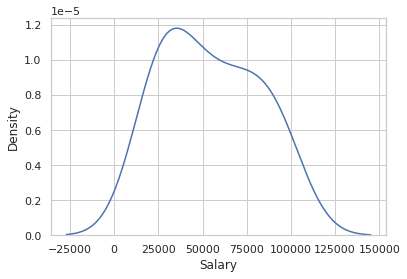

In [ ]:
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.kdeplot(x="Salary", data=dataset)
# countplot = Diagram Batang dengan menghitung variasi.
# Max variasi data 6
# displot = Diagarm Batang tanpa menghitung variasi
# kdeplot = Diagram Garis. Data Berjangka atau range

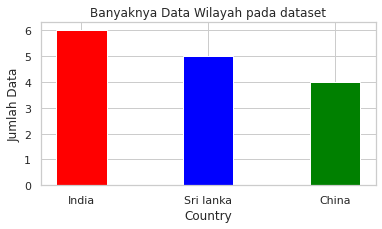

In [ ]:
import matplotlib.pyplot as plt

X = list(dataset['Country'].unique())
Y = list(dataset['Country'].value_counts())

fig = plt.figure(figsize = (6,3))

plt.bar(X, Y, color=["red", "blue", "green", "yellow"],
        width=0.4)

plt.xlabel("Country")
plt.ylabel("Jumlah Data")
plt.title("Banyaknya Data Wilayah pada dataset")
plt.show()

In [ ]:
# Memisahkan antara fitur dan label

# Fitur
# iloc[rows,columns] (Slicing pada dataframe)
# Mengambil semua data dalam barisan.
# Mengambil kolom index ke-0 sampai ke-2
X = dataset.iloc[:,:3].values

# Label
# iloc[rows,columns] (Slicing pada dataframe)
# Mengambil semua data dalam barisan.
# Hanya Mengambil kolom index ke-3
Y = dataset.iloc[:,3].values

In [ ]:
X

array([['India', 34.0, 92000.0],
       ['Sri lanka', 22.0, 25000.0],
       ['China', 31.0, 74000.0],
       ['Sri lanka', 29.0, 50000.0],
       ['China', 55.0, 98000.0],
       ['India', 24.0, 30000.0],
       ['Sri lanka', 28.0, 40000.0],
       ['India', 28.0, 60000.0],
       ['China', 51.0, 89000.0],
       ['India', 44.0, 78000.0],
       ['Sri lanka', 21.0, 20000.0],
       ['China', 25.0, 30000.0],
       ['India', 33.0, 45000.0],
       ['India', 42.0, 65000.0],
       ['Sri lanka', 33.0, 22000.0]], dtype=object)

Dibawah ini kita bisa melihat bahwa tidak ada nilai 'Nan' pada data X

In [ ]:
print ('X: ', X)

X:  [['India' 34.0 92000.0]
 ['Sri lanka' 22.0 25000.0]
 ['China' 31.0 74000.0]
 ['Sri lanka' 29.0 50000.0]
 ['China' 55.0 98000.0]
 ['India' 24.0 30000.0]
 ['Sri lanka' 28.0 40000.0]
 ['India' 28.0 60000.0]
 ['China' 51.0 89000.0]
 ['India' 44.0 78000.0]
 ['Sri lanka' 21.0 20000.0]
 ['China' 25.0 30000.0]
 ['India' 33.0 45000.0]
 ['India' 42.0 65000.0]
 ['Sri lanka' 33.0 22000.0]]


## 3. Encode the Categorical data

Categorical data biasanya biasanya memiliki tipe data string.
Beberapa algoritma dapat memproses categorical data yg berbentuka string secara langsung seperti decision tree.

Akan tetapi banyak machine learning algorithms tidak dapat memproses categorical data yg berbentuk string secara langsung. Mereka membutuhkan variabel yg berbentuk numeric.

Itu artinya categorical data harus dikonversi bentukanya kedalam numerical form.

Pada Dataset kita terdapat dua kolom categorical data

Yaitu kolom 'Country' dan 'Purchased'

#### Label Encoder:

    * Metode ini bisa digunakan untuk mentranform non-numerical labels kedalam bentuk numerical labels (or nominal
      categorical variables).
    * Numerical labels akan selalu ada diantara 0 sampai n_classes-1.
      Misalkan ada 3 kelas, berarti labelnya ada di 0, 1, dan 2.

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
#Encode untuk data kategorikal pada kolom 'Country'
labelencoder_X = LabelEncoder()
X[:,0] = labelencoder_X.fit_transform(X[:,0])
X[:,0]

array([1, 2, 0, 2, 0, 1, 2, 1, 0, 1, 2, 0, 1, 1, 2], dtype=object)

Sekarang categorical value untuk kolom 'Country' dirbah ke dalam bentuk kategorikal

| Country | Value |
|:--------|:------|
| China   |   0   |  
| India   |   1   |   
| Srilanka|   2   |   


In [ ]:
X

array([[1, 34.0, 92000.0],
       [2, 22.0, 25000.0],
       [0, 31.0, 74000.0],
       [2, 29.0, 50000.0],
       [0, 55.0, 98000.0],
       [1, 24.0, 30000.0],
       [2, 28.0, 40000.0],
       [1, 28.0, 60000.0],
       [0, 51.0, 89000.0],
       [1, 44.0, 78000.0],
       [2, 21.0, 20000.0],
       [0, 25.0, 30000.0],
       [1, 33.0, 45000.0],
       [1, 42.0, 65000.0],
       [2, 33.0, 22000.0]], dtype=object)

## 4. Splitting Dataset

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,
                                                 random_state = 0,
                                                 shuffle=False)

In [ ]:
X_train

array([[1, 34.0, 92000.0],
       [2, 22.0, 25000.0],
       [0, 31.0, 74000.0],
       [2, 29.0, 50000.0],
       [0, 55.0, 98000.0],
       [1, 24.0, 30000.0],
       [2, 28.0, 40000.0],
       [1, 28.0, 60000.0],
       [0, 51.0, 89000.0],
       [1, 44.0, 78000.0],
       [2, 21.0, 20000.0],
       [0, 25.0, 30000.0]], dtype=object)

In [ ]:
X_test

array([[1, 33.0, 45000.0],
       [1, 42.0, 65000.0],
       [2, 33.0, 22000.0]], dtype=object)

# MODELLING

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
k = 5
#Train Model and Predict
knn = KNeighborsClassifier(n_neighbors = k).fit(X_train,Y_train)

In [ ]:
Y_test

array(['Yes', 'Yes', 'No'], dtype=object)

In [ ]:
from sklearn import metrics

y_predict = knn.predict(X_test)
print(y_predict)


['No' 'Yes' 'No']


In [ ]:
print("Test set Accuracy: ", metrics.accuracy_score(Y_test, y_predict))

Test set Accuracy:  0.6666666666666666


In [ ]:
Y_test

array(['Yes', 'Yes', 'No'], dtype=object)

In [ ]:
y_predict

array(['No', 'Yes', 'No'], dtype=object)

In [ ]:
cm = metrics.confusion_matrix(Y_test, y_predict, labels=["No", "Yes"])

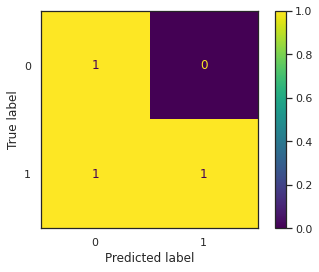

In [ ]:
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=[0,1])
disp.plot()

plt.show()